In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import numpy as np

In [30]:
# Load the dataset
data = pd.read_csv('/Users/jaylee/Library/Mobile Documents/com~apple~CloudDocs/Documents/8_UC Berkeley AI_ML/Capstone Project/ott_churn_model_dataset.csv')
data = data.drop(['customer_id', 'phone_no', 'year'], axis=1)

In [32]:
# Encode categorical variables
categorical_cols = ['gender', 'multi_screen', 'mail_subscribed']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

data.fillna(data.median(), inplace=True)
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}


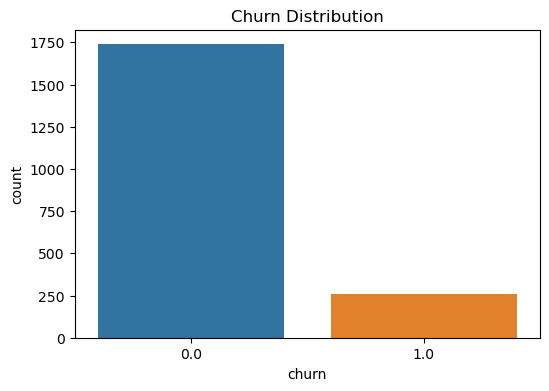

In [36]:
# Churn distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=data)
plt.title('Churn Distribution')
plt.show()

/var/folders/12/4srw8zwj7k74vspkvk626y5c0000gn/T/ipykernel_6592/2484597278.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


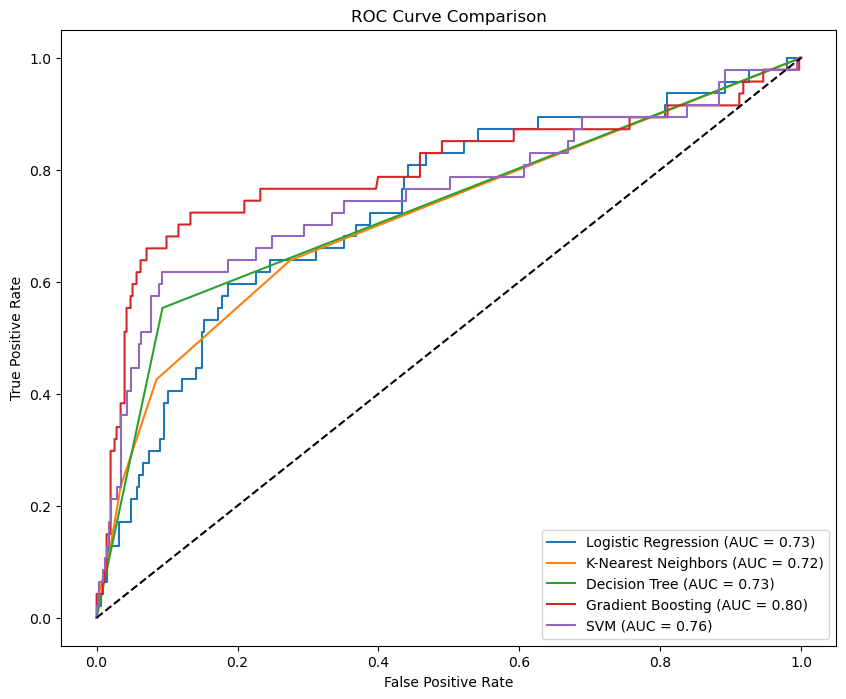

In [38]:
# Training models and evaluating
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"])
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    result = pd.DataFrame([[model_name, accuracy, precision, recall, f1, auc_roc]],
                          columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"])
    results = pd.concat([results, result], ignore_index=True)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_roc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

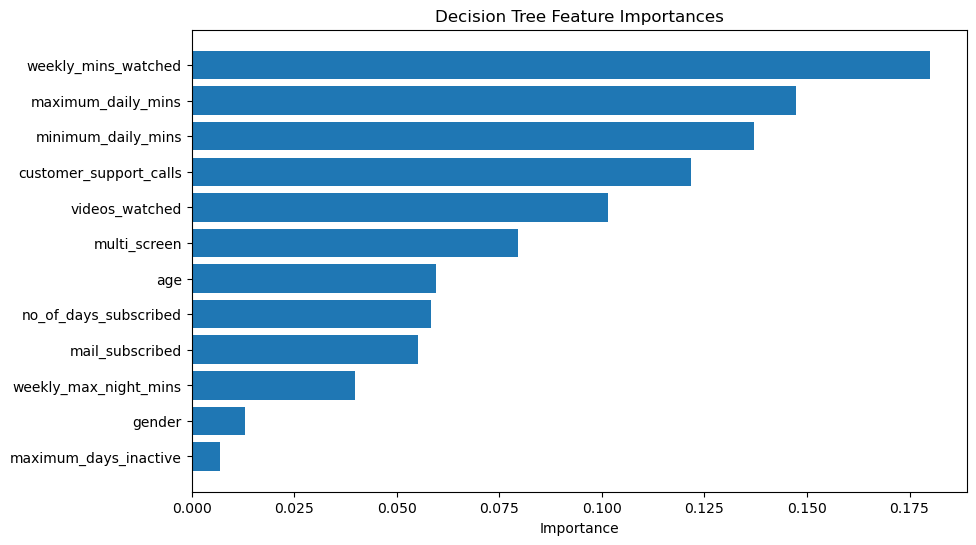

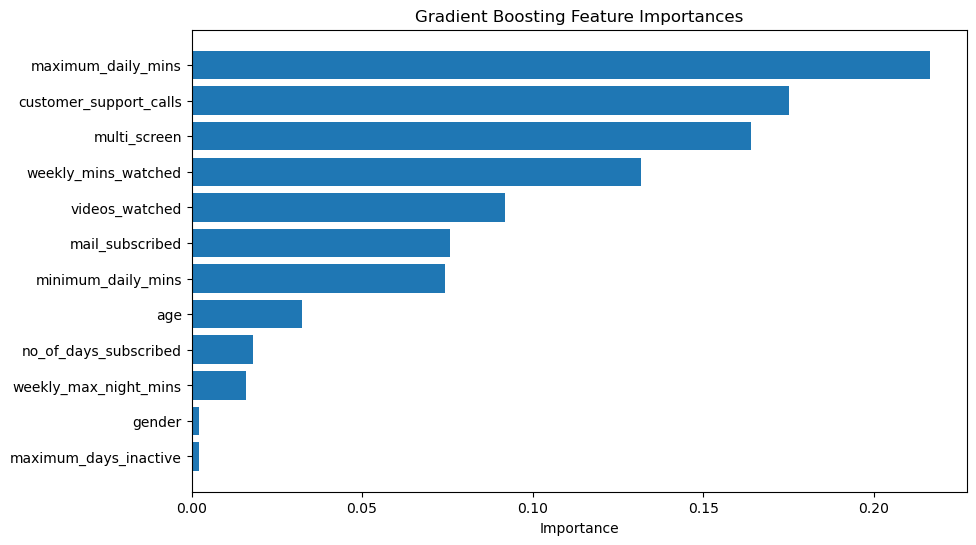

In [40]:
# Feature Importance (for Gradient Boosting and Decision Tree)
for model_name, model in models.items():
    if hasattr(model, "feature_importances_"):
        plt.figure(figsize=(10, 6))
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
        plt.title(f"{model_name} Feature Importances")
        plt.xlabel("Importance")
        plt.show()

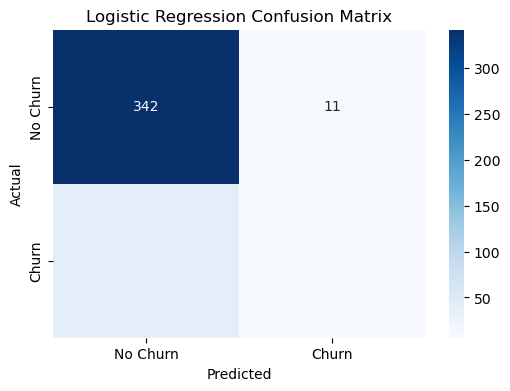

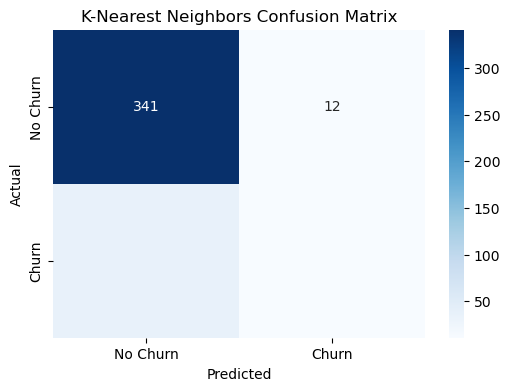

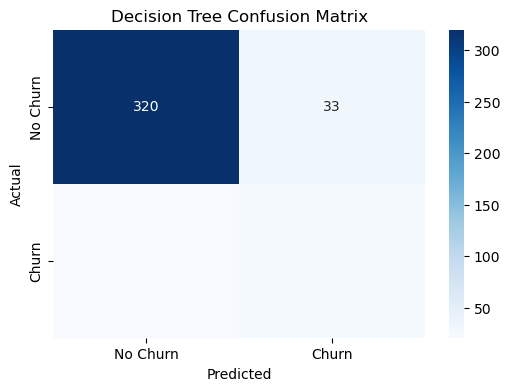

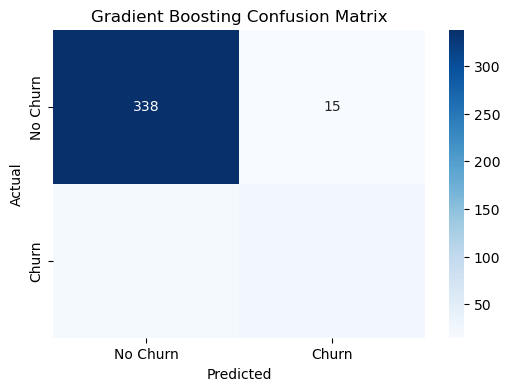

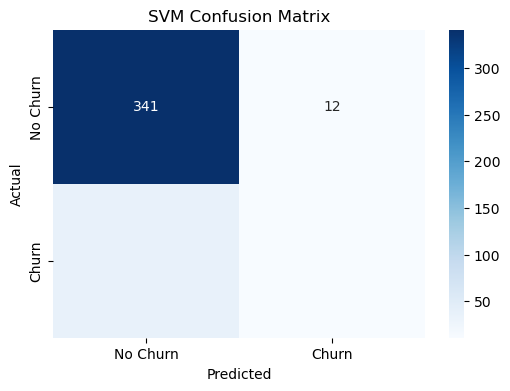

In [42]:
# Confusion Matrix for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [44]:
# Display results table
print(results)

                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression     0.870   0.352941  0.127660  0.187500  0.732566
1  K-Nearest Neighbors     0.880   0.478261  0.234043  0.314286  0.715840
2        Decision Tree     0.865   0.440678  0.553191  0.490566  0.729854
3    Gradient Boosting     0.910   0.634146  0.553191  0.590909  0.798656
4                  SVM     0.880   0.478261  0.234043  0.314286  0.756374
